# [EDA] Heatmap & Grid-scatters
可以有效的將表格型的圖進行視覺化, 常見的 Heatmap
* 相關圖
* Confusion matrix (混淆矩陣)


## Heat map

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. "Heat map" is a newer term but shading matrices have existed for over a century.

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


In [4]:
print(f'type(ext_data_corrs):{type(ext_data_corrs)}')

ext_data_corrs.describe()

type(ext_data_corrs):<class 'pandas.core.frame.DataFrame'>


,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.085411,0.369224,0.250935,0.264514,0.363969
std,0.512721,0.442697,0.440760,0.439096,0.434503
min,-0.178919,-0.155317,-0.160472,-0.178919,-0.078239
25%,-0.160472,0.186846,0.091996,0.109167,0.091996
50%,-0.155317,0.213982,0.109167,0.186846,0.205478
75%,-0.078239,0.600610,0.213982,0.205478,0.600610
max,1.000000,1.000000,1.000000,1.000000,1.000000


## EXT_SOURCE_1

Normalized score from external data source

## EXT_SOURCE_2

Normalized score from external data source

## EXT_SOURCE_3

Normalized score from external data source

------

## seaborn.heatmap

```
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

Parameters:	
> data : rectangular dataset

2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

> vmin, vmax : floats, optional

Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

> cmap : matplotlib colormap name or object, or list of colors, optional

The mapping from data values to color space. If not provided, the default will depend on whether center is set.

> center : float, optional

The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

> robust : bool, optional

If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.

> annot : bool or rectangular dataset, optional

If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

> fmt : string, optional

String formatting code to use when adding annotations.

> annot_kws : dict of key, value mappings, optional

Keyword arguments for ax.text when annot is True.

> linewidths : float, optional

Width of the lines that will divide each cell.

> linecolor : color, optional

Color of the lines that will divide each cell.

> cbar : boolean, optional

Whether to draw a colorbar.

> cbar_kws : dict of key, value mappings, optional

Keyword arguments for fig.colorbar.

> cbar_ax : matplotlib Axes, optional

Axes in which to draw the colorbar, otherwise take space from the main Axes.

> square : boolean, optional

If True, set the Axes aspect to “equal” so each cell will be square-shaped.

> xticklabels, yticklabels : “auto”, bool, list-like, or int, optional

If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

> mask : boolean array or DataFrame, optional

If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.

> ax : matplotlib Axes, optional

Axes in which to draw the plot, otherwise use the currently-active Axes.

> kwargs : other keyword arguments

All other keyword arguments are passed to ax.pcolormesh.

Returns:	
> ax : matplotlib Axes

Axes object with the heatmap.

------

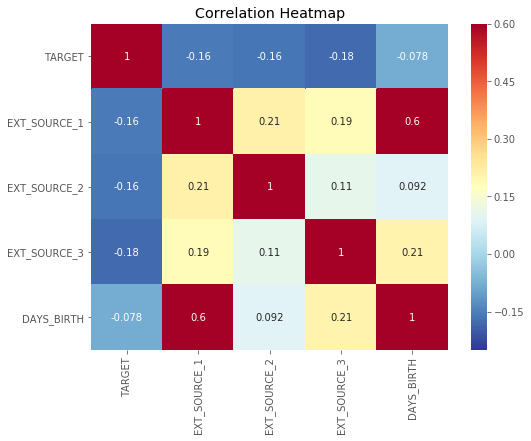

In [5]:
plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [6]:
# Check what enumerate type is
print(f"enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']) {enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])}")

# Enumerate
#     enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
#     Enumerate is a built-in function of Python. Its usefulness can not be summarized in a single line. 
#     Yet most of the newcomers and even some advanced programmers are unaware of it. It allows us to loop over something and have an automatic counter.
list(enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']))

enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']) <enumerate object at 0x00000204D8DFF828>


[(0, 'EXT_SOURCE_1'), (1, 'EXT_SOURCE_2'), (2, 'EXT_SOURCE_3')]

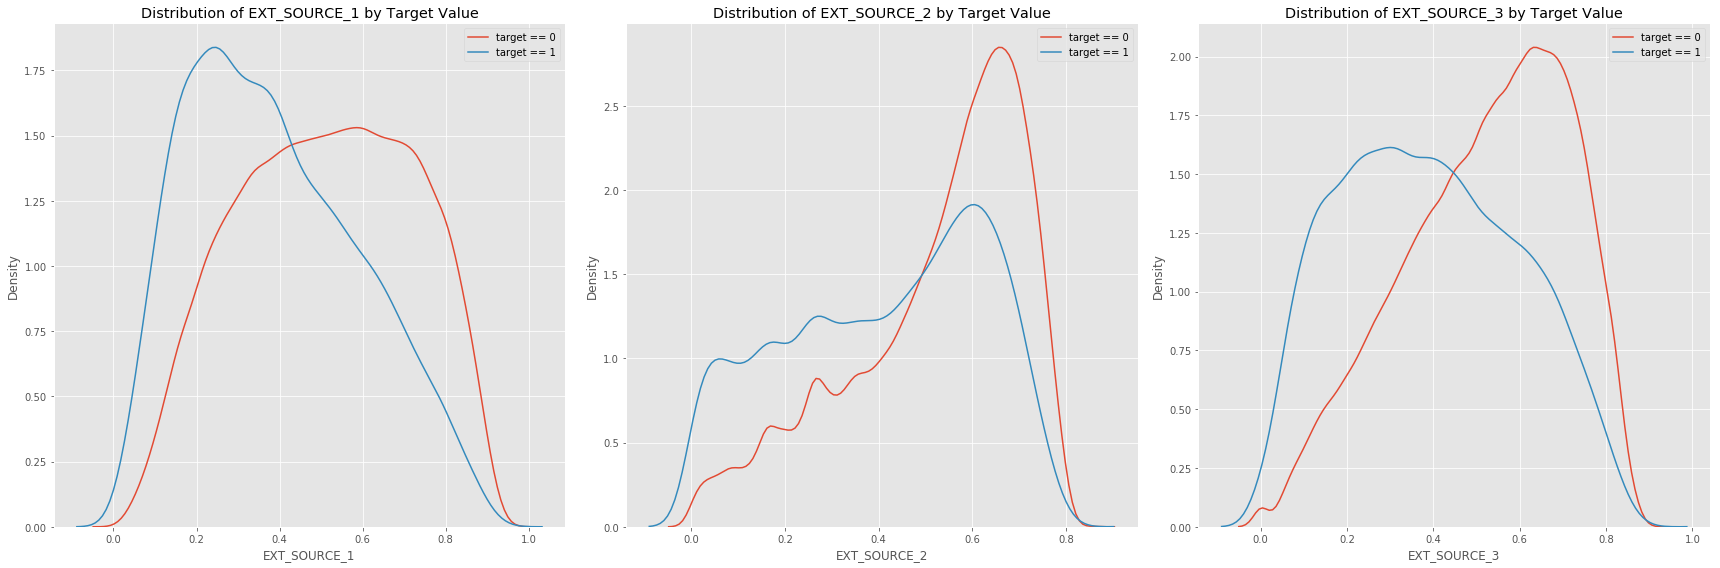

In [7]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同
plt.figure(figsize = (24, 8))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # 做 subplot
    plt.subplot(1, 3, i + 1)
    
    # KDE
    #   選擇 TARGET==0 的, 根據 source 欄位, 劃出 KDE 分布
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label it!
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [8]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy()
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365

# pandas.DataFrame.drop
'''
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
   Drop specified labels from rows or columns
   labels : single label or list-like
   labels : single label or list-like
      Index or column labels to drop.

   axis : {0 or ‘index’, 1 or ‘columns’}, default 0
      Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
'''
plot_data.drop(['DAYS_BIRTH'], axis = 1, inplace=True)

In [9]:
# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

In [10]:
N_sample = 100000
# Drop na values and limit to 100000 data: 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(n = N_sample)

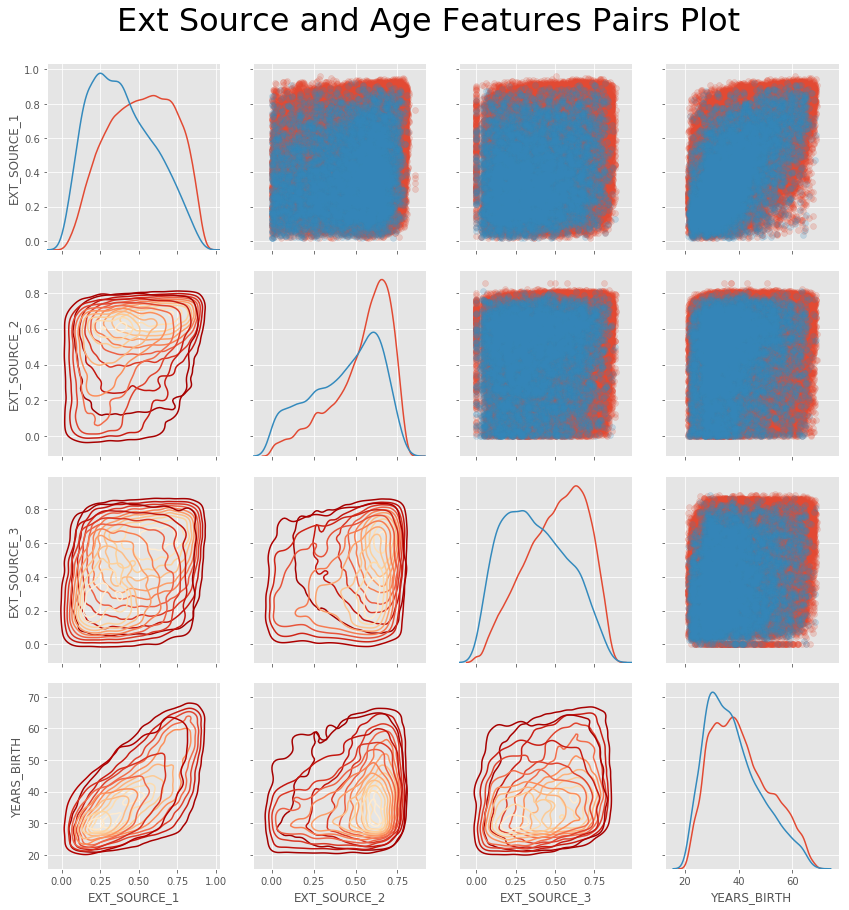

In [11]:
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

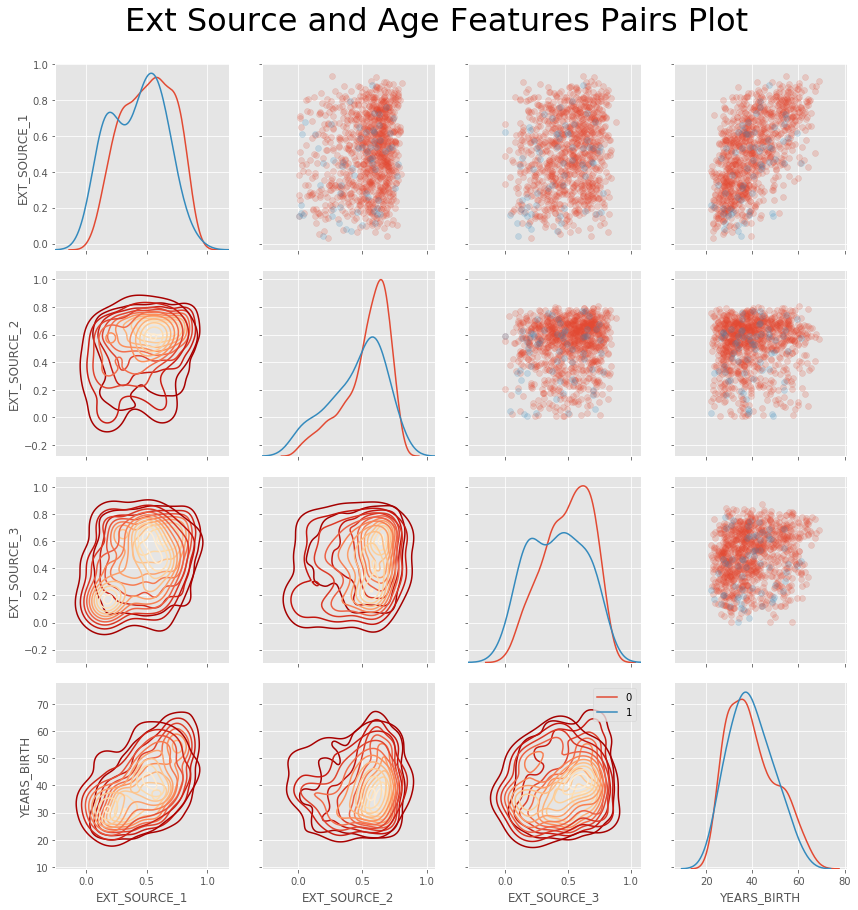

In [13]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.legend()
plt.show()

## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)